# Local approximation models

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('./jmlda.mplstyle')

from lam import utils

###  Loading data

In [7]:
data = pd.read_csv('data_sample.csv')
x = data['gravity.x'].values
y = data['gravity.y'].values
z = data['gravity.z'].values

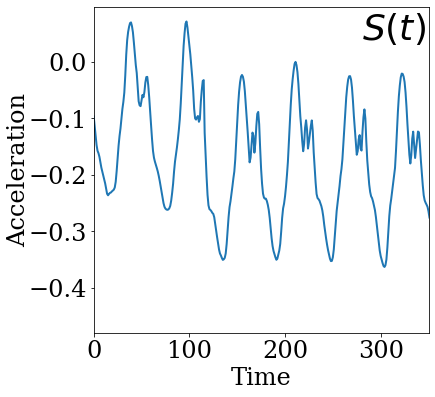

In [8]:
plt.figure(figsize=(6, 6))
plt.plot(x)
plt.xlim(xmin=0, xmax=350)
plt.xlabel('Time')
plt.ylabel('Acceleration', labelpad=-2)
# plt.title('Time series')
plt.text(280, 0.04, r'$S(t)$', fontdict={'fontsize': 36})
plt.savefig('./img/time_series.png', dpi=300, pad_inches=0)
plt.show()

In [4]:
phase = utils.to_phase_trajectory(x, 100)
phase.shape

(1233, 100)

In [5]:
from sklearn.decomposition import PCA

model = PCA(n_components=2)
projection = model.fit_transform(phase)
basis = model.components_
print('Explained variation'
      ' for {} principal components: {}'.format(2,
                                                model.explained_variance_ratio_))
print('Cumulative explained variation'
      'for {} principal components: {}\n'.format(2,
                                                 np.sum(model.explained_variance_ratio_)))

Explained variation for 2 principal components: [0.42726878 0.36239472]
Cumulative explained variationfor 2 principal components: 0.7896635002439452



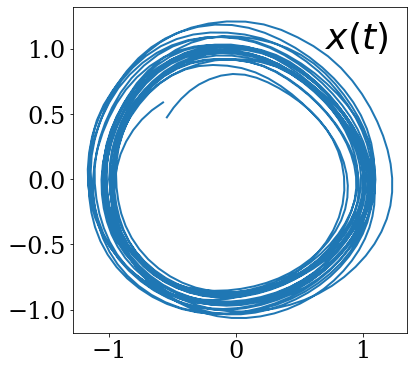

In [6]:
plt.figure(figsize=(6, 6))
plt.plot([p[0] for p in projection], [p[1] for p in projection])
# plt.title('Phase trajectory')
plt.text(0.7, 1, r'$x(t)$', fontdict={'fontsize': 36})
plt.savefig('./img/phase_track.png', dpi=300, pad_inches=0)
plt.show()

In [7]:
p_x = [p[0] for p in projection]
p_y = [p[1] for p in projection]

In [8]:
print(np.argmin(p_x))
print(np.argmax(p_x))
print(np.argmin(p_y))
print(np.argmax(p_y))

1131
1103
23
1118


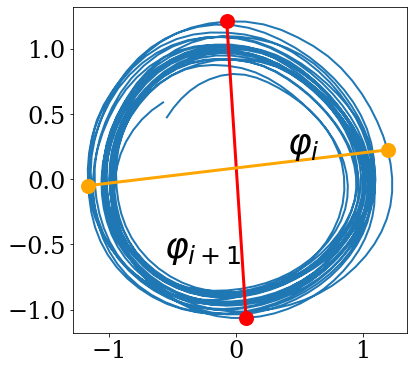

In [9]:
plt.figure(figsize=(6, 6))

plt.plot([p[0] for p in projection], [p[1] for p in projection], zorder=0)

plt.scatter(projection[[23, 1118], 0], projection[[23, 1118], 1], c='r', linewidths=3)
plt.plot(projection[[23, 1118], 0], projection[[23, 1118], 1], c='r', linewidth=3)

plt.plot(projection[[1105, 1132], 0], projection[[1105, 1132], 1], c='orange', linewidth=3)
plt.scatter(projection[[1105, 1132], 0], projection[[1105, 1132], 1], c='orange', linewidths=3)

plt.text(0.4, 0.2, r'$\varphi_i$', {'fontsize': 36})
plt.text(-0.57, -0.6, r'$\varphi_{i + 1}$', {'fontsize': 36})

# plt.title('Feature description')
plt.savefig('./img/features.png', dpi=300, pad_inches=0)
plt.show()